In [153]:
# Import Dependencies
import os
from dotenv import load_dotenv
import requests
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import matplotlib.pyplot as plt
#from datetime import datetime
#import pytz

In [154]:
# RUN ONCE
load_dotenv()
API_KEY = os.getenv('SPECIAL_API_KEY')

In [155]:
# RUN ONCE
params = {
 'function': 'CRYPTO_INTRADAY',
 'symbol': 'ETH',
 'market': 'USD',
 'interval': '5min',
 'time_zone': 'US/Eastern Time',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
price_data = r.json()
print(price_data.keys())
r.close()

https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=ETH&market=USD&interval=5min&time_zone=US%2FEastern+Time&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Time Series Crypto (5min)'])


In [156]:
price_df = pd.DataFrame(price_data['Time Series Crypto (5min)']).T
print(price_data['Meta Data'])
price_df.reset_index(inplace=True)
price_df['date.utc'] = price_df['index']
price_df = price_df.drop('index', 1)
price_df.head()

{'1. Information': 'Crypto Intraday (5min) Time Series', '2. Digital Currency Code': 'ETH', '3. Digital Currency Name': 'Ethereum', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2021-12-28 01:10:00', '7. Interval': '5min', '8. Output Size': 'Compact', '9. Time Zone': 'UTC'}


/tmp/ipykernel_861/2187447110.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  price_df = price_df.drop('index', 1)


,1. open,2. high,3. low,4. close,5. volume,date.utc
0,4022.29000,4022.35000,4011.16000,4011.40000,461,2021-12-28 01:10:00
1,4020.21000,4022.92000,4010.00000,4022.29000,1198,2021-12-28 01:05:00
2,4028.83000,4028.83000,4020.00000,4020.21000,848,2021-12-28 01:00:00
3,4030.46000,4031.28000,4026.31000,4028.83000,664,2021-12-28 00:55:00
4,4025.56000,4031.87000,4022.44000,4030.47000,812,2021-12-28 00:50:00


In [157]:
# RUN ONCE
params = {
 'function': 'BBANDS',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'time_period': '100',
 'series_type': 'open',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
bband_data = r.json()
print(bband_data.keys())
r.close()

https://www.alphavantage.co/query?function=BBANDS&symbol=ETHUSD&interval=5min&time_period=100&series_type=open&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])


In [158]:
bbands_df = pd.DataFrame(bband_data['Technical Analysis: BBANDS']).T
print(bband_data['Meta Data'])
bbands_df.reset_index(inplace=True)
bbands_df['date.est'] = bbands_df['index']
bbands_df = bbands_df.drop('index', 1)
bbands_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Bollinger Bands (BBANDS)', '3: Last Refreshed': '2021-12-27 20:10:00', '4: Interval': '5min', '5: Time Period': 100, '6.1: Deviation multiplier for upper band': 2, '6.2: Deviation multiplier for lower band': 2, '6.3: MA Type': 0, '7: Series Type': 'open', '8: Time Zone': 'US/Eastern Time'}


/tmp/ipykernel_861/2177948158.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bbands_df = bbands_df.drop('index', 1)


,Real Lower Band,Real Upper Band,Real Middle Band,date.est
0,4014.8520,4132.1448,4073.4984,2021-12-27 20:10
1,4016.3521,4131.9949,4074.1735,2021-12-27 20:05
2,4017.9876,4131.8318,4074.9097,2021-12-27 20:00
3,4019.2816,4131.7184,4075.5000,2021-12-27 19:55
4,4020.5188,4131.5156,4076.0172,2021-12-27 19:50


In [159]:
df = price_df.join(bbands_df, how = 'left')
df.head()

,1. open,2. high,3. low,4. close,5. volume,date.utc,Real Lower Band,Real Upper Band,Real Middle Band,date.est
0,4022.29000,4022.35000,4011.16000,4011.40000,461,2021-12-28 01:10:00,4014.8520,4132.1448,4073.4984,2021-12-27 20:10
1,4020.21000,4022.92000,4010.00000,4022.29000,1198,2021-12-28 01:05:00,4016.3521,4131.9949,4074.1735,2021-12-27 20:05
2,4028.83000,4028.83000,4020.00000,4020.21000,848,2021-12-28 01:00:00,4017.9876,4131.8318,4074.9097,2021-12-27 20:00
3,4030.46000,4031.28000,4026.31000,4028.83000,664,2021-12-28 00:55:00,4019.2816,4131.7184,4075.5000,2021-12-27 19:55
4,4025.56000,4031.87000,4022.44000,4030.47000,812,2021-12-28 00:50:00,4020.5188,4131.5156,4076.0172,2021-12-27 19:50


In [160]:
# format = '%Y-%m-%d %H:%M'

# datetime = datetime.strptime(bband_data['Meta Data']['3. Last Refreshed'], format)
# old_timezone = pytz.timezone(bband_data['Meta Data']['8. Time Zone'])
# new_timezone = pytz.timezone("Asia/Calcutta")

# # returns datetime in the new timezone
# my_timestamp_in_new_timezone = old_timezone.localize(datetime).astimezone(new_timezone) 
# print(my_timestamp_in_new_timezone.strftime(format))

In [161]:
# Dictionary with original and new column names.
new_col_names = {'1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume',
        'Real Middle Band': 'bband.mid',
        'Real Upper Band': 'bband.up',
        'Real Lower Band': 'bband.low'}
  
# Call rename() method. 
df.rename(columns= new_col_names,
          inplace=True)

In [162]:
df = df.drop('date.est', 1)
df = df.set_index('date.utc')

/tmp/ipykernel_861/3140491876.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('date.est', 1)


In [163]:
df.head()

,open,high,low,close,volume,bband.low,bband.up,bband.mid
date.utc,,,,,,,,
2021-12-28 01:10:00,4022.29000,4022.35000,4011.16000,4011.40000,461,4014.8520,4132.1448,4073.4984
2021-12-28 01:05:00,4020.21000,4022.92000,4010.00000,4022.29000,1198,4016.3521,4131.9949,4074.1735
2021-12-28 01:00:00,4028.83000,4028.83000,4020.00000,4020.21000,848,4017.9876,4131.8318,4074.9097
2021-12-28 00:55:00,4030.46000,4031.28000,4026.31000,4028.83000,664,4019.2816,4131.7184,4075.5000
2021-12-28 00:50:00,4025.56000,4031.87000,4022.44000,4030.47000,812,4020.5188,4131.5156,4076.0172


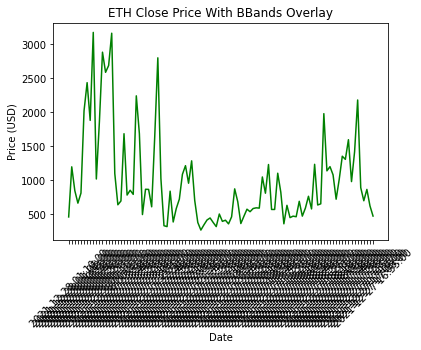

In [164]:
# Case Study 5
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set title and axes labels
axs.set_title("ETH Close Price With BBands Overlay")
axs.set_xlabel("Date")
axs.set_ylabel("Price (USD)")

# Create the plot 
axs.plot(df['volume'], "-", label = "Volume", color = "green")

plt.xticks(rotation=45)

# Show 
plt.show()